# Histograms of Color
![cutout1.jpg](./cutouts/cutout1.jpg)

You can construct histograms of the R, G, and B channels like this:

```python
import matplotlib.image as mpimg
import numpy as np

# Read in the image
image = mpimg.imread('cutout1.jpg')

# Take histograms in R, G, and B
rhist = np.histogram(image[:,:,0], bins=32, range=(0, 256))
ghist = np.histogram(image[:,:,1], bins=32, range=(0, 256))
bhist = np.histogram(image[:,:,2], bins=32, range=(0, 256))
```

With `np.histogram()`, you don't actually have to specify the number of bins or the range, but here I've arbitrarily chosen 32 bins and specified `range=(0, 256)` in order to get orderly bin sizes. `np.histogram()` returns a tuple of two arrays. In this case, for example, `rhist[0]` contains the counts in each of the bins and `rhist[1]` contains the bin edges (so it is one element longer than `rhist[0]`).

To look at a plot of these results, we can compute the bin centers from the bin edges. Each of the histograms in this case have the same bins, so I'll just use the rhist bin edges:

```python
# Generating bin centers
bin_edges = rhist[1]
bin_centers = (bin_edges[1:]  + bin_edges[0:len(bin_edges)-1])/2
```
And then plotting up the results in a bar chart:

```python
# Plot a figure with all three bar charts
fig = plt.figure(figsize=(12,3))
plt.subplot(131)
plt.bar(bin_centers, rhist[0])
plt.xlim(0, 256)
plt.title('R Histogram')
plt.subplot(132)
plt.bar(bin_centers, ghist[0])
plt.xlim(0, 256)
plt.title('G Histogram')
plt.subplot(133)
plt.bar(bin_centers, bhist[0])
plt.xlim(0, 256)
plt.title('B Histogram')
```
Which gives us this result:
![rgb-histogram-plot.jpg](./img/rgb-histogram-plot.jpg)

These, collectively, are now our feature vector for this particular cutout image. We can concatenate them in the following way:

```python
hist_features = np.concatenate((rhist[0], ghist[0], bhist[0]))
```

Having a function that does all these steps might be useful for the project so for this next exercise, your goal is to write a function that takes an image and computes the RGB color histogram of features given a particular number of bins and pixels intensity range, and returns the concatenated RGB feature vector, like this:

```python
# Define a function to compute color histogram features  
def color_hist(img, nbins=32, bins_range=(0, 256)):
    # Compute the histogram of the RGB channels separately
    # Concatenate the histograms into a single feature vector
    # Return the feature vector    
```

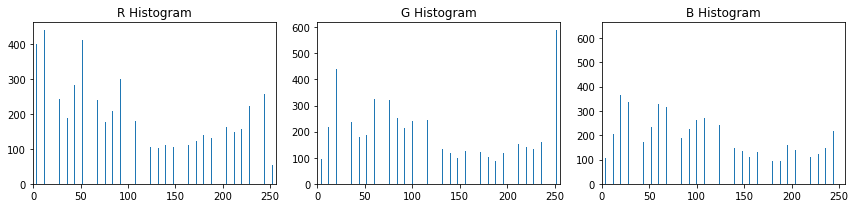

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

path = './cutouts/'
image = mpimg.imread(path+'cutout1.jpg')

# Define a function to compute color histogram features  
def color_hist(img, nbins=32, bins_range=(0, 256)):
    # Compute the histogram of the RGB channels separately
    rhist = np.histogram(img[:,:,0], bins=nbins, range=bins_range)
    ghist = np.histogram(img[:,:,1], bins=nbins, range=bins_range)
    bhist = np.histogram(img[:,:,2], bins=nbins, range=bins_range)
    # Generating bin centers
    bin_edges = rhist[1]
    bin_centers = (bin_edges[1:]  + bin_edges[0:len(bin_edges)-1])/2
    # Concatenate the histograms into a single feature vector
    hist_features = np.concatenate((rhist[0], ghist[0], bhist[0]))
    # Return the individual histograms, bin_centers and feature vector
    return rhist, ghist, bhist, bin_centers, hist_features
    
    
rh, gh, bh, bincen, feature_vec = color_hist(image, nbins=32, bins_range=(0, 256))

# Plot a figure with all three bar charts
if rh is not None:
    fig = plt.figure(figsize=(12,3))
    plt.subplot(131)
    plt.bar(bincen, rh[0])
    plt.xlim(0, 256)
    plt.title('R Histogram')
    plt.subplot(132)
    plt.bar(bincen, gh[0])
    plt.xlim(0, 256)
    plt.title('G Histogram')
    plt.subplot(133)
    plt.bar(bincen, bh[0])
    plt.xlim(0, 256)
    plt.title('B Histogram')
    fig.tight_layout()
else:
    print('Your function is returning None for at least one variable...')